#### Dataset: CIFAR-10 


##### Image Classification using LeNet architecture without data augmentation

In the provided code, we're teaching a Convolutional Neural Network (CNN) known as LeNet to recognize patterns in the CIFAR-10 dataset. This dataset is made up of 60,000 color images, each sized at 32x32 pixels and spread across 10 different classes, with each class containing 6,000 images. Out of these, 50,000 are designated for training the model, and the remaining 10,000 serve as test images. The primary objective of this network is to accurately identify and categorize the images into their correct classes.

In [1]:

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim


Initially, we establish the structure of the LeNet model within the LeNet class, incorporating layers such as convolutional, pooling, and fully connected layers. The forward function delineates the path data takes through the network's layers.


In [2]:
#!python -m pip  install torchvision

In [3]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool1(nn.functional.relu(self.conv1(x)))
        x = self.pool2(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x


Following that, we prepare the CIFAR-10 dataset for use by employing the torchvision package from PyTorch. This involves setting up a transformation to change the images into PyTorch tensors and adjusting the pixel values to a standard scale. To manage the training and testing datasets, we assemble DataLoader instances with a set batch size of 64.

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


Next, we specify the loss function (nn.CrossEntropyLoss()), the optimizer (optim.SGD()), and the computing device (either CPU or GPU) that will be utilized for training the model.

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = LeNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

The model undergoes training for 20 epochs, during which we iterate over the training set, executing forward and backward passes within the network through the loss.backward() and optimizer.step() functions. To keep track of the training process, we report the running loss after every 200 mini-batches.

In [6]:
import time
start_time = time.time()
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:    # Print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished training in %.3f seconds' % (time.time() - start_time))

[1,   200] loss: 2.300
[1,   400] loss: 2.295
[1,   600] loss: 2.278
[2,   200] loss: 2.108
[2,   400] loss: 2.033
[2,   600] loss: 1.983
[3,   200] loss: 1.904
[3,   400] loss: 1.879
[3,   600] loss: 1.832
[4,   200] loss: 1.757
[4,   400] loss: 1.722
[4,   600] loss: 1.662
[5,   200] loss: 1.614
[5,   400] loss: 1.595
[5,   600] loss: 1.563
[6,   200] loss: 1.522
[6,   400] loss: 1.512
[6,   600] loss: 1.511
[7,   200] loss: 1.478
[7,   400] loss: 1.443
[7,   600] loss: 1.437
[8,   200] loss: 1.401
[8,   400] loss: 1.393
[8,   600] loss: 1.379
[9,   200] loss: 1.339
[9,   400] loss: 1.357
[9,   600] loss: 1.341
[10,   200] loss: 1.305
[10,   400] loss: 1.301
[10,   600] loss: 1.303
[11,   200] loss: 1.276
[11,   400] loss: 1.258
[11,   600] loss: 1.263
[12,   200] loss: 1.244
[12,   400] loss: 1.236
[12,   600] loss: 1.234
[13,   200] loss: 1.197
[13,   400] loss: 1.206
[13,   600] loss: 1.203
[14,   200] loss: 1.179
[14,   400] loss: 1.174
[14,   600] loss: 1.158
[15,   200] loss: 1

Following the training phase, the model's performance is assessed on the test set by iterating through it and calculating the proportion of images accurately identified. The overall accuracy rate is then displayed at the conclusion of the script.

In [7]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
print('Finished testing in %.3f seconds' % (time.time() - start_time))

Accuracy of the network on the 10000 test images: 61 %
Finished testing in 213.680 seconds


In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Evaluate on test set
net.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true += labels.cpu().numpy().tolist()
        y_pred += predicted.cpu().numpy().tolist()

# Generate confusion matrix
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
conf_matrix = confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion matrix:")
print(np.array2string(conf_matrix, separator=', ', 
                      formatter={'int': lambda x: f"{x:3d}"}))

# Print accuracy
accuracy = 100 * correct / total
print(f"Accuracy: {accuracy:.2f}%")


Confusion matrix:
[[572,  59,  62,  23,  54,  18,  27,  17, 130,  38],
 [ 20, 805,   4,  11,   7,   9,  13,   7,  31,  93],
 [ 42,  25, 389,  78, 173, 107, 110,  41,  22,  13],
 [ 19,  29,  44, 418,  96, 202,  91,  60,  16,  25],
 [  9,  14,  47,  48, 634,  53,  78,  97,  15,   5],
 [  8,   8,  48, 189,  89, 518,  32,  84,  12,  12],
 [  4,  12,  33,  59,  79,  27, 769,  10,   5,   2],
 [  6,   6,  19,  51, 116,  98,   8, 681,   2,  13],
 [ 60,  88,  13,  20,  27,  10,  13,  13, 712,  44],
 [ 25, 175,   6,  11,  11,  15,  15,  35,  42, 665]]
Accuracy: 61.63%


The overall accuracy of 61.63% suggests a moderate level of performance. Improving this could involve techniques such as data augmentation (to provide the model with a more varied learning base), adjusting the model architecture or parameters, or employing more sophisticated models better suited to capturing the nuances of the CIFAR-10 dataset.

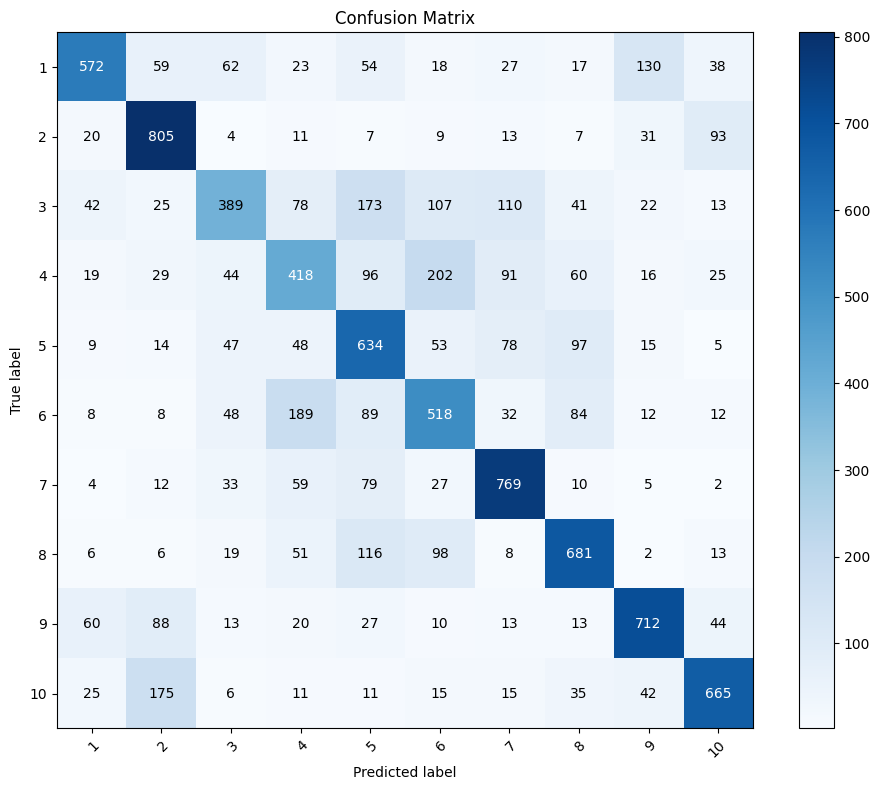

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix
confusion_matrix = np.array([[572,  59,  62,  23,  54,  18,  27,  17, 130,  38],
                             [ 20, 805,   4,  11,   7,   9,  13,   7,  31,  93],
                             [ 42,  25, 389,  78, 173, 107, 110,  41,  22,  13],
                             [ 19,  29,  44, 418,  96, 202,  91,  60,  16,  25],
                             [  9,  14,  47,  48, 634,  53,  78,  97,  15,   5],
                             [  8,   8,  48, 189,  89, 518,  32,  84,  12,  12],
                             [  4,  12,  33,  59,  79,  27, 769,  10,   5,   2],
                             [  6,   6,  19,  51, 116,  98,   8, 681,   2,  13],
                             [ 60,  88,  13,  20,  27,  10,  13,  13, 712,  44],
                             [ 25, 175,   6,  11,  11,  15,  15,  35,  42, 665]])

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(confusion_matrix.shape[1]),
       yticks=np.arange(confusion_matrix.shape[0]),
       xticklabels=np.arange(1, 11), yticklabels=np.arange(1, 11),
       title="Confusion Matrix",
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
thresh = confusion_matrix.max() / 2.
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(j, i, format(confusion_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if confusion_matrix[i, j] > thresh else "black")
plt.tight_layout()
plt.show()
